<a href="https://colab.research.google.com/github/ehs208/machinelearning/blob/main/8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST 데이터 불러오기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


## 합성곱 신경망 만들기

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

두번째 합성곱 층 + 완전 연결 층
과대적합을 막기 위해 드롭아웃을 추가

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 100)               1254500   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

모델 파라미터 수를 계산

첫번째 (3,3,1) 크기의 32개의 필터, 필터마나 하나으 ㅣ절편

3*3*1*32+32 = 320

두번째 (3,3,32) 크기 64개 필터, 필터마다 하나의 절편

3*3*32*64+64 = 18496

Flatten 층에서 (7,7,64) 크기의 특성 맵을 1차원 배열로 펼치면 7*7*64 = 3136

이를 100개의 뉴런과 완전히 연결해야 하므로 은닉층의 파라미터 개수는 3136*100+100

마지막 출력층은 100*10+10

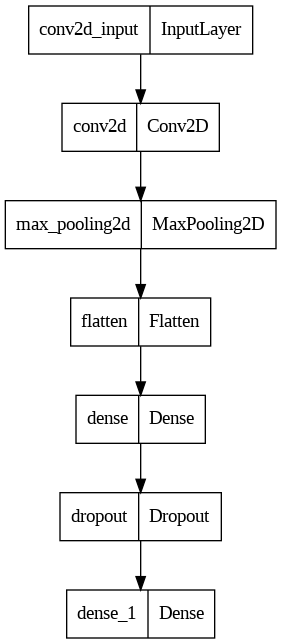

In [ ]:
keras.utils.plot_model(model)

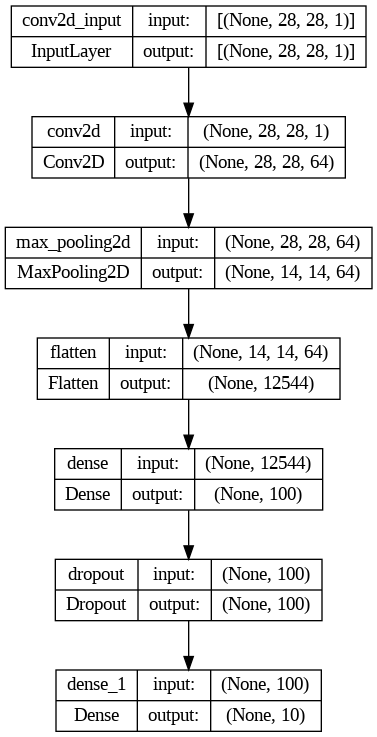

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

## 모델 컴파일과 훈련

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/8-2/best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 19s 5ms/step - loss: 0.5039 - accuracy: 0.8219 - val_loss: 0.3106 - val_accuracy: 0.8852
Epoch 2/20
  29/1500 [..............................] - ETA: 5s - loss: 0.3461 - accuracy: 0.8718

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 6s 4ms/step - loss: 0.3419 - accuracy: 0.8754 - val_loss: 0.2820 - val_accuracy: 0.8966
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.2972 - accuracy: 0.8919 - val_loss: 0.2586 - val_accuracy: 0.9043
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2706 - accuracy: 0.9010 - val_loss: 0.2479 - val_accuracy: 0.9081
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2442 - accuracy: 0.9092 - val_loss: 0.2501 - val_accuracy: 0.9093
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2288 - accuracy: 0.9166 - val_loss: 0.2410 - val_accuracy: 0.9123
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2082 - accuracy: 0.9223 - val_loss: 0.2349 - val_accuracy: 0.9143
Epoch 8/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1933 - accuracy: 0.9276 - val_loss: 0.2374 - val_accuracy: 0.9171
Epo

In [ ]:
import matplotlib.pyplot as plt

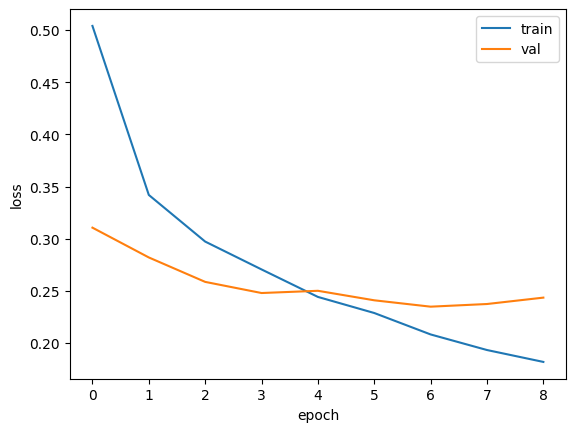

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2349 - accuracy: 0.9143


[0.2348596155643463, 0.9143333435058594]

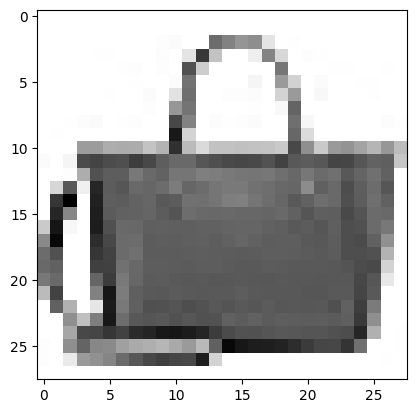

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 97ms/step
[[3.7035548e-20 1.4578819e-28 1.7178772e-20 8.8517033e-24 1.3083642e-19
  6.6420649e-19 1.8813524e-18 1.8143657e-18 1.0000000e+00 7.6391608e-21]]


슬라이싱한 이유

predict() 메서드에 데이터를 전달할 때, val_scaled[0]이 아닌 val_scaled[0:1}로 슬라이싱함  
그 이유는 메서드가 모두 입력의 첫번째 차원이 배치 차원으로 생각하기 때문  
따라서 샘플 하나를 전달할 때는 (28,28,1)이 아니라 (1,28,28,1)로 전달 해아함

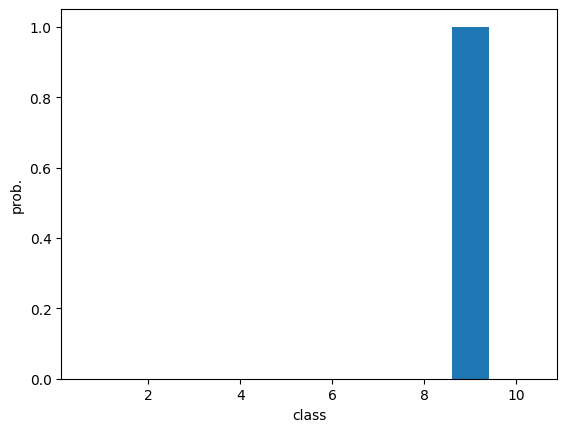

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


테스트 샘플에 대한 예측 수행

In [ ]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0 #다시 맞춰줘야함

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2588 - accuracy: 0.9085


[0.25883570313453674, 0.9085000157356262]